# Introduction

We will adhere to a series of essential procedures that can enhance our analysis in order to produce a reliable trading strategy through machine learning. Our first move will be to delve into the **Financial Bars** concepts.

Instead of relying on traditional time bars, we will investigate dollar/tick/volume bars to structure our financial data. By grouping transactions together based on a fixed dollar/tick/volume amount, we can reduce noise in the data and enhance our ability to identify meaningful patterns.




# Financial Data Structures

Before determining the most suitable structure to use, we will look into the various data structures available and the statistical properties they possess.

Financial data structures consist of **time bars, tick bars, volume bars, and dollar bars**. Time bars are based on predetermined time intervals, such as a minute or an hour, and reveal trading activities during that time. Tick bars, on the other hand, display a specific number of trades that have occurred in each bar, for example, 100 trades. Volume bars are structured based on the total number of shares traded, such as a bar that represents 10,000 shares traded. Dollar bars are based on the total dollar value of shares traded and showcase the opening, closing, high, and low prices for trades executed in each bar. 

Tick bars are more frequently sampled as the number of trades increase, while volume bars are more frequently sampled as the traded volume increases. However, tick bars may not accurately reflect fluctuating asset values due to repetitive or manipulative trades. Therefore, volume bars may be more suitable as they only consider total volume traded. However, dollar bars can alternatively be used as they measure the fiat value of shares exchanged, avoiding the problem of misleading repetitive trades.

Dollar bars are often viewed as more informative than other bar types because they offer a more comprehensive view of market activity and can more efficiently document times of high volatility. One advantage of dollar bars is their ability to diminish the influence of extraneous factors on financial data; in contrast, time-based bars may be subject to faulty signals due to low trading activity or market closures. As dollar bars are established utilizing tangible trading activity, they are more resilient to this type of interference.

# Financial Data Structures with RiskLabAI

The aim of this notebook is to serve as a guide to help users connect ideas to their actual implementation. It will specifically focus on creating different financial data structures and formatting data for utilization with the MlFinLab package.

To demonstrate the process, we used sample tick data in `ahrom_edited.csv` file.

## Import packages

In [4]:
from controller.data_structure_controller import Controller

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# !pip3 install dtale
import dtale

In [5]:
controller = Controller()
data = pd.read_csv('../ahrom_edited.csv')
data["date"] = pd.to_datetime(data["date"])
data

,date,price,volume
0,2022-06-01 09:05:25,13170.0,5000.0
1,2022-06-01 09:06:38,13170.0,500.0
2,2022-06-01 09:06:38,13180.0,5000.0
3,2022-06-01 09:06:38,13190.0,4500.0
4,2022-06-01 09:08:09,13180.0,440.0
...,...,...,...
729721,2023-03-29 12:29:58,22720.0,24.0
729722,2023-03-29 12:29:58,22720.0,21981.0
729723,2023-03-29 12:29:58,22720.0,1000.0
729724,2023-03-29 12:29:58,22720.0,100.0


# Financial Data Structures Using RiskLabAI

In the second step, we construct different data structures. While our emphasis is on the standard bars in this notebook, the information-driven bars are also at our disposal.

## Dollar Standard Bars

In [6]:
dollar_standard = controller.handle_input_command(
    method_name="dollar_standard_bars",
    method_arguments={
        "threshold": 60_000_000_000,
    },
    input_data=data,
    batch_size=1_000_000,
)

dollar_standard

batch 0 with size 729726


,Date Time,Tick Number,Open,High,Low,Close,Cumulative Volume,Cumulative Buy Volume,Cumulative Sell Volume,Cumulative Ticks,Cumulative Dollar Value,Threshold
0,2022-06-01 11:53:13,361,13170.0,13390.0,12850.0,13100.0,4602162.0,2129547.0,2472615.0,361,6.018782e+10,60000000000
1,2022-06-06 09:54:16,724,13100.0,13200.0,12220.0,12460.0,4678312.0,1589824.0,3088488.0,363,6.004993e+10,60000000000
2,2022-06-07 09:29:29,1242,12460.0,12770.0,12260.0,12520.0,4836196.0,2396111.0,2440085.0,518,6.002969e+10,60000000000
3,2022-06-07 12:00:43,1599,12520.0,12700.0,12300.0,12350.0,4784633.0,1983871.0,2800762.0,357,6.015340e+10,60000000000
4,2022-06-08 10:15:23,1911,12330.0,12750.0,12300.0,12600.0,4785471.0,1512559.0,3272912.0,312,6.014171e+10,60000000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2708,2023-03-29 12:22:19,728865,22600.0,22630.0,22550.0,22630.0,2660201.0,1745068.0,915133.0,222,6.005972e+10,60000000000
2709,2023-03-29 12:24:03,729057,22630.0,22700.0,22630.0,22700.0,2655995.0,1979292.0,676703.0,192,6.021466e+10,60000000000
2710,2023-03-29 12:25:39,729207,22700.0,22730.0,22670.0,22730.0,2825859.0,2023088.0,802771.0,150,6.415170e+10,60000000000
2711,2023-03-29 12:27:20,729413,22730.0,22810.0,22730.0,22810.0,2653304.0,1977808.0,675496.0,206,6.042023e+10,60000000000


## Fixed Dollar Imbalance Bars

In [15]:
fixed_dollar_imbalance = controller.handle_input_command(
    method_name="fixed_dollar_imbalance_bars",
    method_arguments={
        "window_size_for_expected_imbalance_estimation": 100000,
        "initial_estimate_of_expected_n_ticks_in_bar": 10000,
    },
    input_data=data,
    batch_size=1_000_000,
)

fixed_dollar_imbalance

batch 0 with size 729726


,Date Time,Tick Number,Open,High,Low,Close,Cumulative Volume,Cumulative Buy Volume,Cumulative Sell Volume,Cumulative Ticks,Cumulative Dollar Value,Threshold
0,2022-06-25 09:31:16,11286,13170.0,13450.0,12020.0,12480.0,187670854.0,56915504.0,130755350.0,11286,2.411222e+12,9.416787e+11
1,2022-09-04 12:07:11,46094,12500.0,12530.0,10150.0,10520.0,428949926.0,175870754.0,253079172.0,34808,4.739481e+12,8.456605e+11
2,2022-10-01 10:18:34,57050,10520.0,10710.0,9280.0,9300.0,114458723.0,41269342.0,73189381.0,10956,1.135483e+12,3.152873e+11
3,2022-10-24 10:37:57,66143,9290.0,9370.0,8500.0,8510.0,114795380.0,39881236.0,74914144.0,9093,1.031735e+12,3.120788e+11
4,2022-11-12 09:20:06,96770,8510.0,11050.0,7710.0,10820.0,530003244.0,247079540.0,282923704.0,30627,5.188985e+12,3.270107e+11
...,...,...,...,...,...,...,...,...,...,...,...,...
845,2023-03-26 10:54:59,686625,21220.0,21230.0,20970.0,21000.0,11528413.0,2718063.0,8810350.0,1001,2.430722e+11,1.280299e+11
846,2023-03-26 11:12:42,688822,21000.0,21090.0,20750.0,20750.0,29318192.0,10718726.0,18599466.0,2197,6.131364e+11,1.550012e+11
847,2023-03-26 12:28:43,693203,20750.0,20910.0,20600.0,20660.0,36848589.0,13944008.0,22904581.0,4381,7.641143e+11,1.845565e+11
848,2023-03-28 10:31:58,712239,20660.0,22370.0,20550.0,21410.0,219722429.0,104579916.0,115142513.0,19036,4.722263e+12,2.206656e+11


## Stability

In [16]:
dollar_standard_bars = dollar_standard.set_index(['Date Time'])
fixed_dollar_imbalance_bars = fixed_dollar_imbalance.set_index(['Date Time'])

# Testing for partial return to normality

The Jarque-Bera test is an assessment of how well a dataset's skewness and kurtosis match a normal distribution. Its main use is to test the assumption of normality in residuals during regression analysis, and its test statistic is determined by multiplying the sample size by the skewness and kurtosis of the sample.

Another common test used for normality is the Shapiro-Wilk test. It checks if a dataset is normally distributed by comparing the observed distribution to the expected distribution under the assumption of normality. The test statistic is derived from the differences between observed and expected values squared.

Both tests are employed to determine if a dataset could have been drawn from a normal distribution, but the Shapiro-Wilk test is usually regarded as more accurate, particularly for smaller datasets. Furthermore, while the Jarque-Bera test only accounts for skewness and kurtosis, the Shapiro-Wilk test considers the entire distribution.

It is best practice to combine these two tests with other diagnostic tools to fully evaluate whether a dataset can be reasonably assumed to be drawn from a normal distribution.

## Jarque-Bera Test

In [9]:
dollar_standard_bars_returns = np.log(dollar_standard_bars['Close']).diff().dropna()
fixed_dollar_imbalance_bars_returns = np.log(fixed_dollar_imbalance_bars['Close']).diff().dropna()

In [17]:
int(stats.jarque_bera(dollar_standard_bars)[0])

14227

In [18]:
int(stats.jarque_bera(fixed_dollar_imbalance_bars)[0])

543815545

## Shapiro-Wilk Test

In [19]:
stats.shapiro(dollar_standard_bars_returns)

ShapiroResult(statistic=0.864446759223938, pvalue=1.821688003622262e-43)

In [20]:
stats.shapiro(fixed_dollar_imbalance_bars_returns)

ShapiroResult(statistic=0.41210997104644775, pvalue=0.0)

If the Jarque-Bera test statistic is lower, it indicates that the returns are more normally distributed. In this instance, the time bars had the highest test statistic, whereas volume bars had the lowest, and dollar bars were in the middle. Surprisingly, the volume bars had a skewness and kurtosis closest to that of a normal distribution, despite the Jarque-Bera test only accounting for these factors.

With regards to the Shapiro-Wilk test, the closer the test statistic is to 1, the more it approximates a normal distribution. Once more, we can see that both volume and dollar bars show an improvement from time bars.

## Results KDE plot 

#### Standardize Data

In [21]:
dollar_standard_bars_returns_standard = (dollar_standard_bars_returns - dollar_standard_bars_returns.mean()) / dollar_standard_bars_returns.std()
fixed_dollar_imbalance_bars_standard = (fixed_dollar_imbalance_bars_returns - fixed_dollar_imbalance_bars_returns.mean()) / fixed_dollar_imbalance_bars_returns.std()

### Distribution Plot

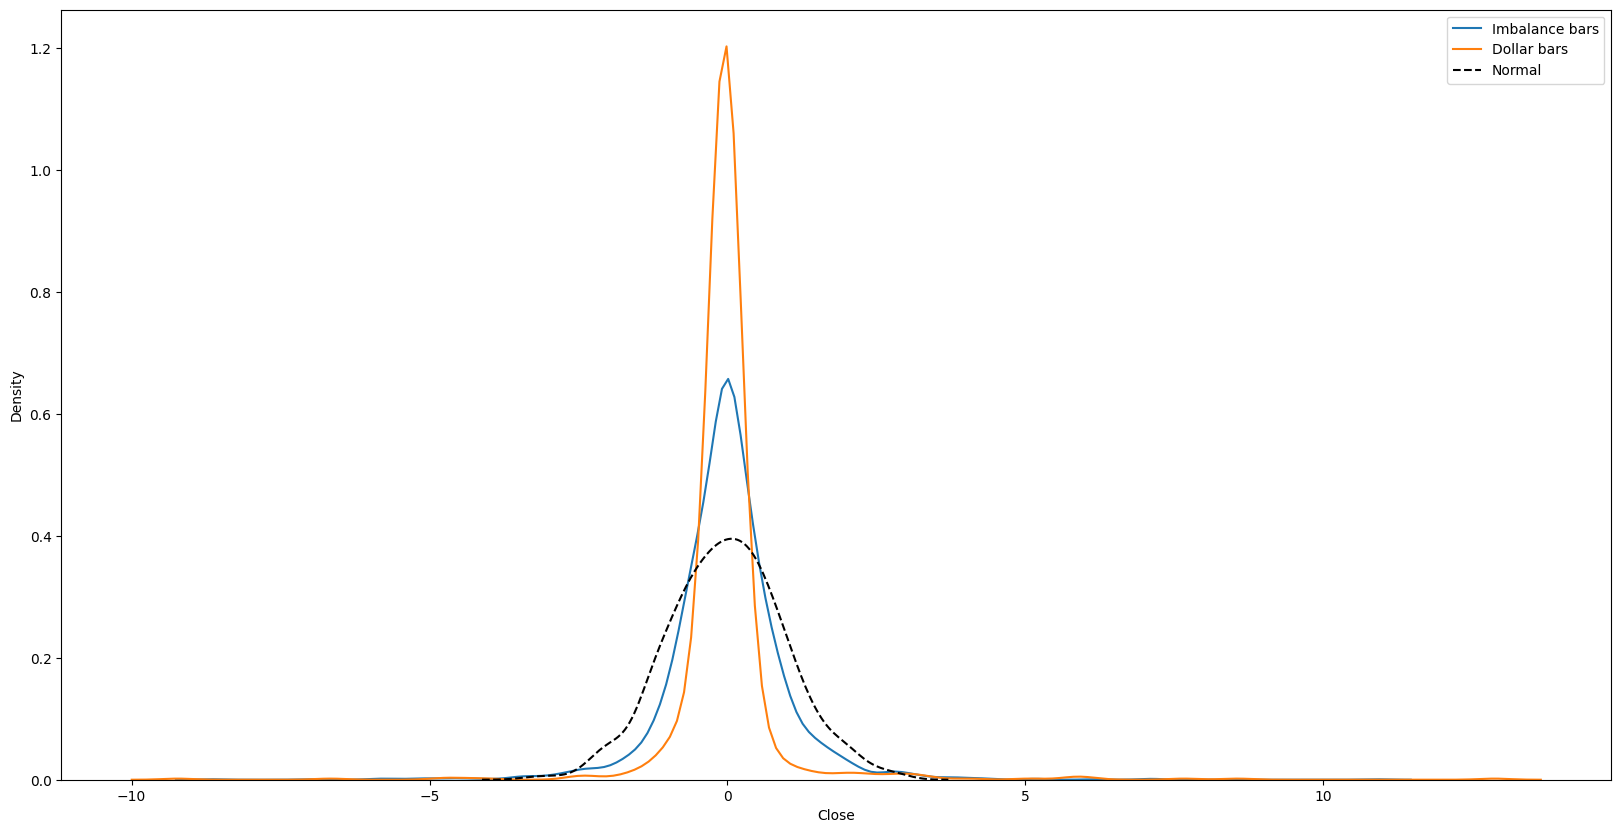

In [24]:
# Plot results
plt.figure(figsize=(20,10))
sns.kdeplot(dollar_standard_bars_returns_standard, label="Imbalance bars")
sns.kdeplot(fixed_dollar_imbalance_bars_standard, label="Dollar bars")
sns.kdeplot(np.random.normal(size=1000), label="Normal", color='black', linestyle="--")
plt.legend()